In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/adity/Downloads/archive (1)/salary.csv")

In [3]:
df.head()

,experience,test_score,interview_score,Salary
0,NaN,8.0,8.0,50000
1,NaN,5.0,4.0,22000
2,three,6.0,5.0,30000
3,five,9.0,9.0,55000
4,six,3.0,5.0,13000


In [4]:
df.describe()

,test_score,interview_score,Salary
count,19.000000,19.000000,20.000000
mean,5.447368,5.657895,30350.000000
std,2.832817,2.516902,19780.439567
min,1.000000,1.000000,500.000000
25%,3.000000,4.500000,12750.000000
50%,5.000000,6.000000,27500.000000
75%,8.000000,7.750000,48500.000000
max,9.000000,9.000000,60000.000000


In [5]:
df.isnull().sum()

experience         5
test_score         1
interview_score    1
Salary             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   experience       15 non-null     object 
 1   test_score       19 non-null     float64
 2   interview_score  19 non-null     float64
 3   Salary           20 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 768.0+ bytes


In [7]:
df['experience'] = df['experience'].fillna(df['experience'].mode().iloc[0])
df['test_score'] = df['test_score'].fillna(df['test_score'].mean())
df['interview_score'] = df['interview_score'].fillna(df['test_score'].mean())

In [8]:
df

,experience,test_score,interview_score,Salary
0,five,8.000000,8.000000,50000
1,five,5.000000,4.000000,22000
2,three,6.000000,5.000000,30000
3,five,9.000000,9.000000,55000
4,six,3.000000,5.000000,13000
5,five,2.000000,1.000000,9000
6,ten,8.000000,6.000000,48000
7,one,1.000000,2.000000,500
8,fifteen,9.000000,9.000000,60000
9,thirteen,7.500000,7.500000,45000


In [9]:
df.isnull().sum()

experience         0
test_score         0
interview_score    0
Salary             0
dtype: int64

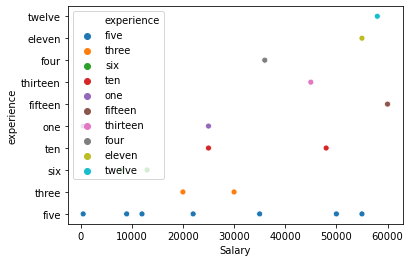

In [10]:
sns.scatterplot(data=df, x="Salary", y="experience", hue = 'experience')

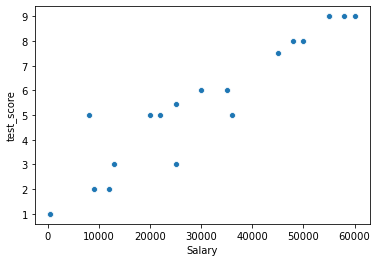

In [11]:
sns.scatterplot(data=df, x="Salary", y="test_score")

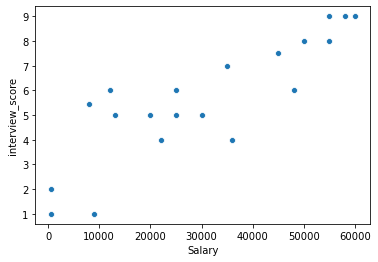

In [12]:
sns.scatterplot(data=df, x="Salary", y="interview_score")

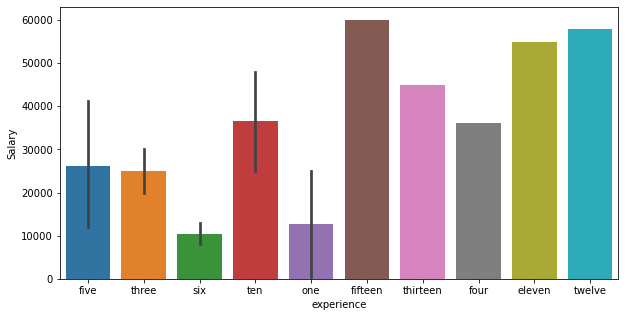

In [13]:
plt.figure(figsize = (10,5))
sns.barplot(x="experience", y="Salary", data=df)

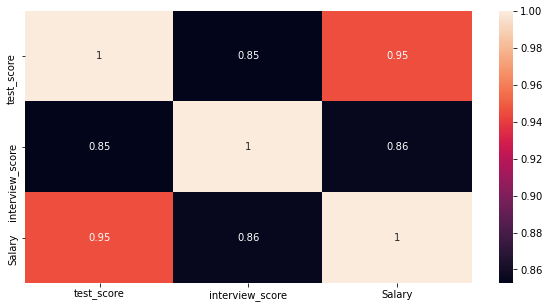

In [14]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot=True)

In [15]:
exp = pd.get_dummies(df['experience'], drop_first = True)

In [16]:
data = pd.concat([df, exp], axis = 1)
data.drop(['experience'], axis = 1, inplace = True)

In [17]:
data.head()

,test_score,interview_score,Salary,fifteen,five,four,one,six,ten,thirteen,three,twelve
0,8.0,8.0,50000,0,1,0,0,0,0,0,0,0
1,5.0,4.0,22000,0,1,0,0,0,0,0,0,0
2,6.0,5.0,30000,0,0,0,0,0,0,0,1,0
3,9.0,9.0,55000,0,1,0,0,0,0,0,0,0
4,3.0,5.0,13000,0,0,0,0,1,0,0,0,0


In [18]:
x = data.drop(['Salary'], axis = 1)
y = df['Salary']

In [19]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_transform = scalar.fit_transform(x)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 0)

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [24]:
lr.score(x_train, y_train)

0.9674245059948481

In [29]:
pred = lr.predict(x_test)

In [30]:
lr.score(x_test, y_test)

0.9409955493764651

In [32]:
import pickle
file = 'Salary_prediction_model.pkl'
pickle.dump(lr, open(file, 'wb'))